In [1]:
import os
os.environ["THEANO_FLAGS"] = "device=gpu"
from tasks import check
import theano.tensor as T

/home/mcherti/build/Theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")
/home/mcherti/build/Theano/theano/sandbox/cuda/nvcc_compiler.py:224: UserWarning: You have the cuda library directory in your lib_dirs. This has been known to cause problems and should not be done.
  warnings.warn("You have the cuda library directory in your "
Using gpu device 0: Tesla K20Xm (CNMeM is disabled, CuDNN 3007)
/home/mcherti/work/code/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


Couldn't import dot_parser, loading of dot files will not be possible.


In [123]:
v = check(what="notebook", 
          filename="training/26olivetti/model.pkl", 
          dataset="olivetti")

Loading data...


INFO:tasks:Loading data...


Loading the model...


INFO:tasks:Loading the model...


conv:(None, 64, 28, 28)
unconv:(None, 1, 64, 64)
conv:(None, 128, 10, 10)
unconv:(None, 1, 64, 64)
conv:(None, 256, 1, 1)
unconv:(None, 1, 64, 64)
3
Compiling the model...


INFO:tasks:Compiling the model...


In [124]:
capsule, data, layers, w, h, c = v
print(layers.keys())

['input', 'conv0', 'conv1', 'conv2', 'wta_lifetime_0', 'wta_lifetime_1', 'wta_lifetime_2', 'out0', 'out1', 'out2', 'output']


In [141]:
from lasagne import layers as L
import theano
import numpy as np

names= ["wta_lifetime_0","wta_lifetime_1", "wta_lifetime_2"]
layerval = {name: T.tensor4() for name in names}
layervalordered = [layerval[name] for name in names]

x = T.tensor4()
CST = theano.shared(np.array(5.).astype(np.float32))

recons = L.get_output(
    layers["output"], 
    {layers[name]: layerval[name] * CST for name in names}
)

get_layer = theano.function(
  [x],
  [L.get_output(layers[name], x) for name in names]
)
get_recons = theano.function(
  layervalordered,
  recons
)

recons_error = ((recons - L.get_output(layers["output"], recons)) ** 2).sum(axis=(1, 2, 3)).mean()

loss = recons_error # - 0.001 * norm
get_loss = theano.function(
      layervalordered,
      loss
)

get_loss = theano.function(layervalordered, loss)
get_grad = theano.function(layervalordered, [theano.grad(loss, layerval[name]) for name in names])
#get_cst_grad = theano.function([x], theano.grad(loss, CST))


In [142]:
nb_examples = 10
shape_inp = (nb_examples,) + (c, w, h)
shape = (nb_examples,) + layers[name].output_shape[1:]

In [143]:
import numpy as np
def eval_loss(x0):
    x0_ = x0.reshape(shape).astype(np.float32)
    l = get_loss(x0_)
    return l

def eval_grad(x0):
    x0_ = x0.reshape(shape).astype(np.float32)
    g = np.array(get_grad(x0_)).flatten().astype(np.float64)
    return g


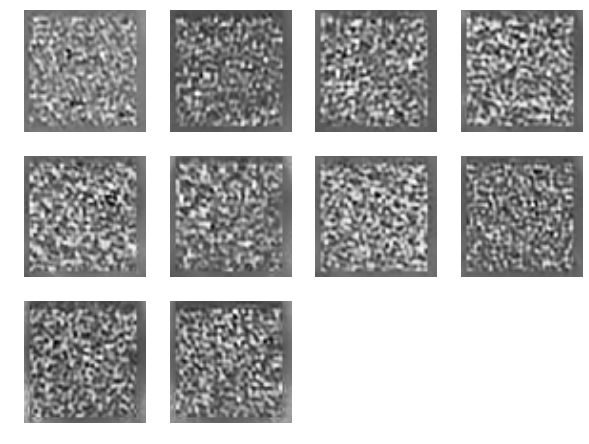

24.3398284912
25.1056213379
17.6497936249
22.4566001892
27.4129695892
19.9399356842
24.4285087585
26.2917480469
19.2002468109
15.9967899323


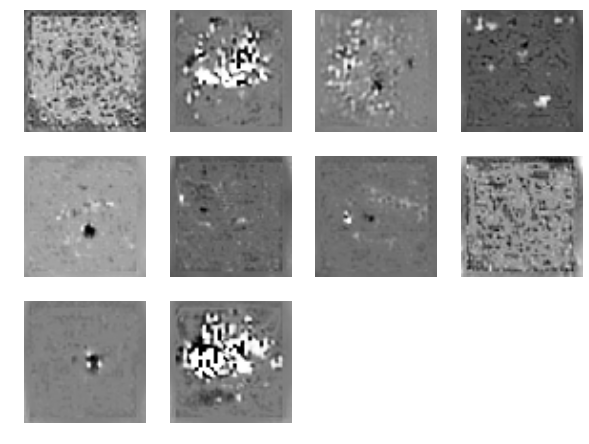

15.5232315063
11.5884380341
12.8331508636
9.43073558807
8.56080150604
8.8893737793
9.14478778839
11.8697404861
13.3576259613
8.83060932159


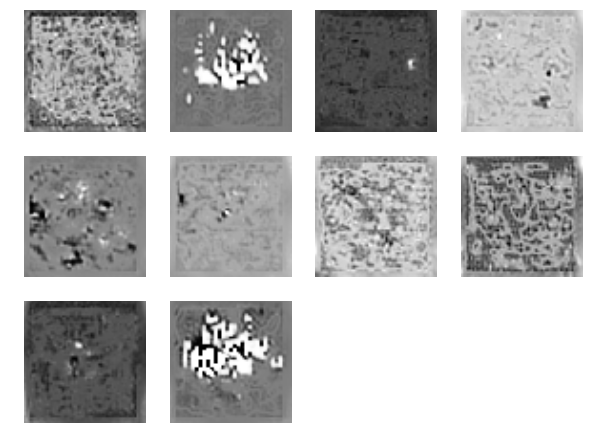

10.5608139038
8.25296211243
6.34921455383
6.44141674042
12.7933826447
11.2712783813
11.5029602051
9.81166267395
11.24634552
10.388094902


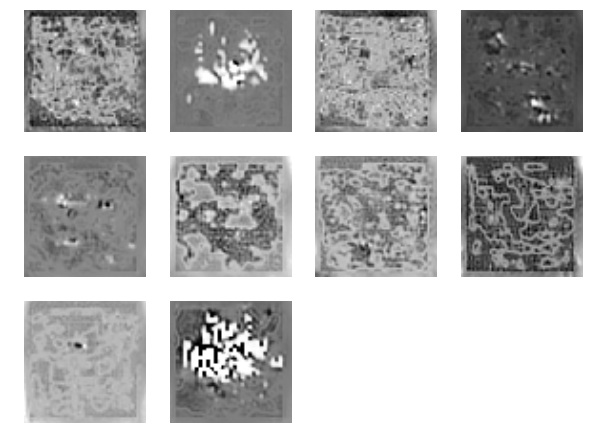

6.93205881119
8.25364685059
8.69131469727
9.34113883972
7.63927173615
8.59773254395
7.89788675308
5.82035207748
6.37205791473
7.68609905243


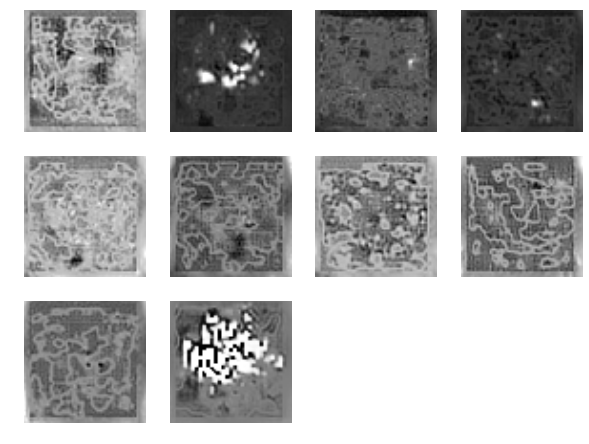

4.98437356949
5.29654550552
5.12911319733
6.11402893066
6.07649230957
6.28415822983
7.53283214569
6.23863840103
5.36706781387
5.00145339966


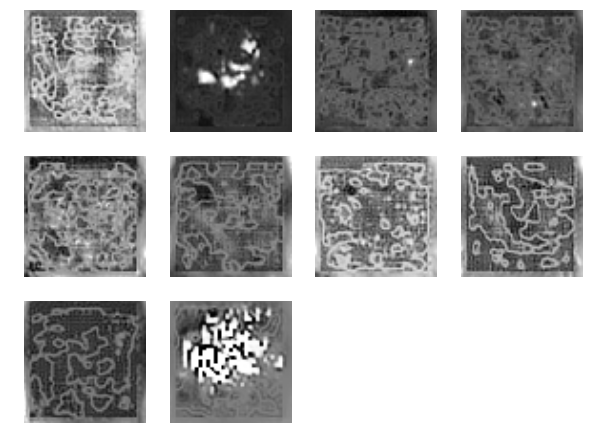

4.72545337677
4.68132638931
5.66009473801
7.00073337555
7.36477661133
7.00504779816
6.55844974518
5.71907901764
5.68659162521
6.20183324814


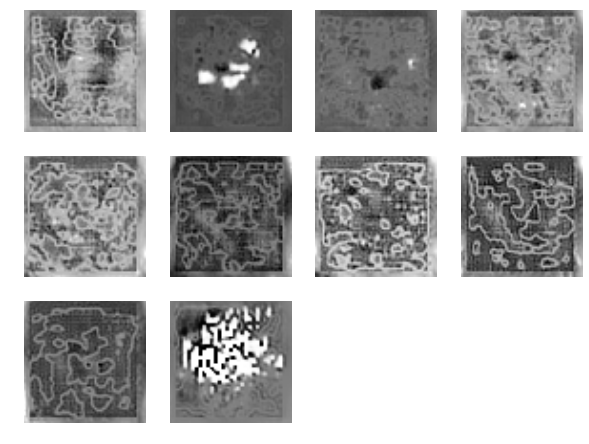

6.60172891617
5.50431060791
5.04865932465
5.35330057144
5.18713903427
4.50406169891
4.40881586075
5.06092405319
4.26481628418
4.59172677994


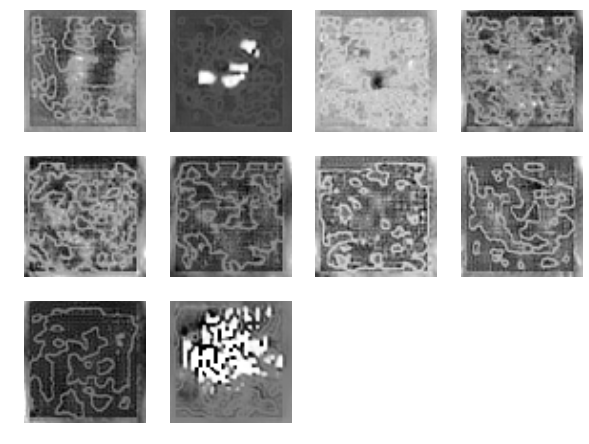

4.45018529892
4.73351478577
4.68379735947
4.7393579483
4.51782417297
4.64250135422
4.37318325043
6.2619562149
5.89129638672
5.18491315842


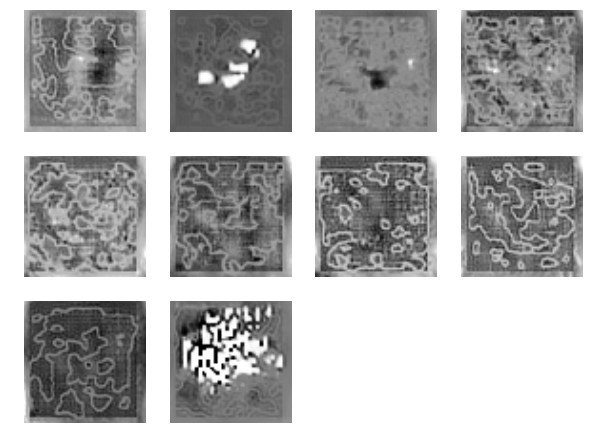

4.69179296494
4.9037322998
5.48917961121
5.37489318848
4.1294260025
4.46446895599
4.87644910812
5.14855289459
4.57185554504
3.77445149422


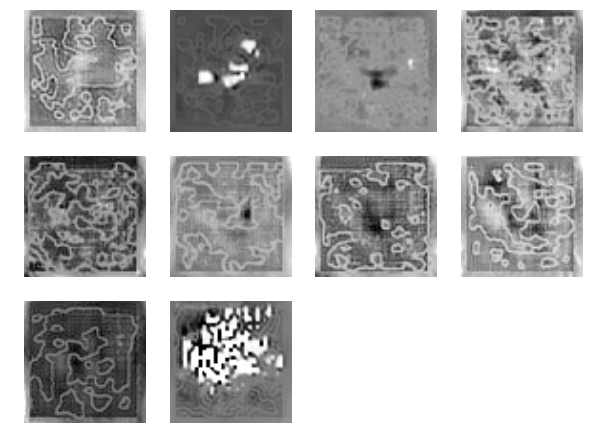

4.17102909088
4.22019481659
4.57200336456
5.76319932938
5.46141338348
5.21598339081
5.16056537628
5.14298915863
6.4758234024
5.11334514618


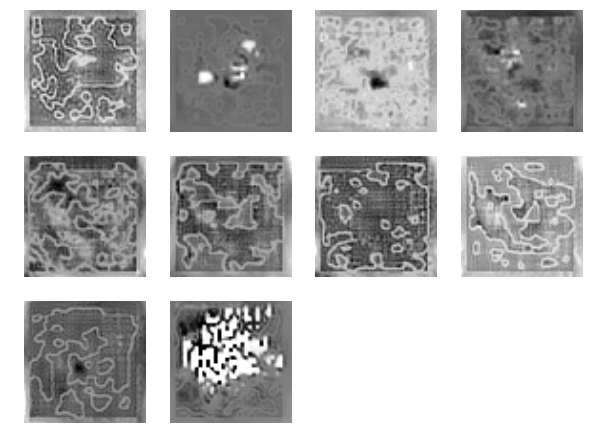

5.01749706268
5.60263681412
5.35971736908
5.97993755341
6.09693622589
4.61182022095
5.33906841278
5.18367385864
4.91257238388
4.62223958969


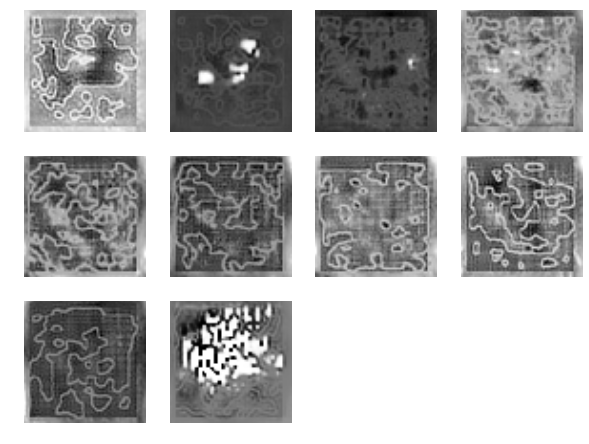

4.86740112305
4.84466791153
4.8032579422
4.96050548553
4.50136566162
4.6804895401
5.49342823029
5.85439348221
5.64471292496
5.35427951813


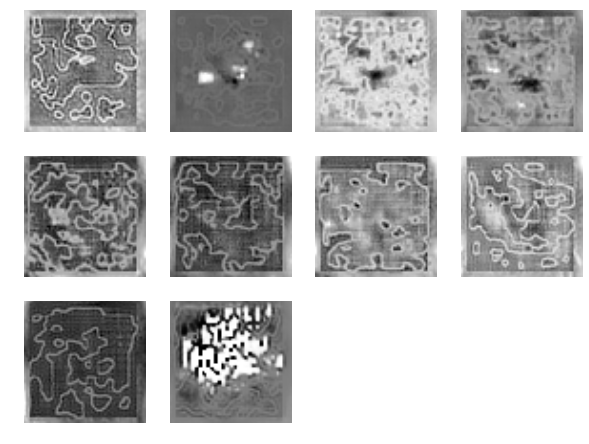

5.29193401337
4.26582622528
5.09704017639
4.51823139191
5.21635532379
5.13891077042
5.51291656494
6.11779308319
4.70928096771
5.05721569061


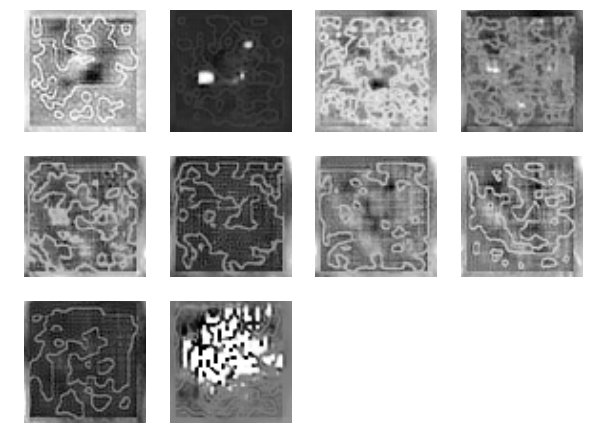

4.73445463181
4.62325954437
4.55407428741
5.84601354599
5.36237239838
4.8467001915
5.22561120987
4.95871067047
4.18247127533
4.44335269928


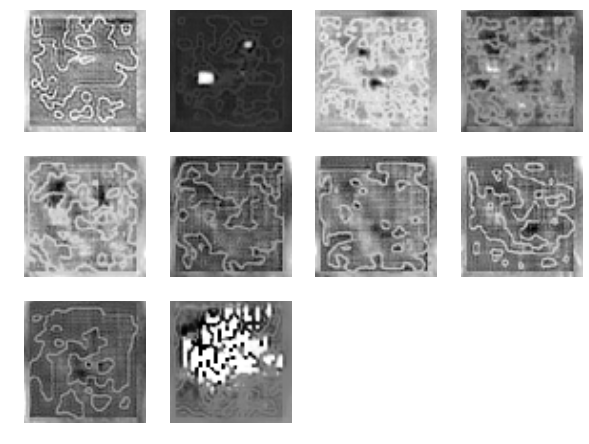

4.9190826416
4.67606258392
4.63030147552
4.28570270538
3.94216609001
4.4163403511
4.75703907013
4.59932231903
4.01855182648
4.09468364716


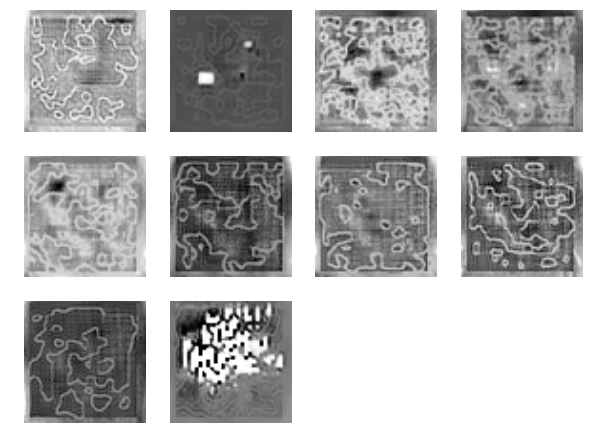

5.01162338257
4.27353191376
4.6534113884
4.06365585327
4.61080408096
3.9307487011
3.99409937859
3.91886377335
4.0095000267
3.98451304436


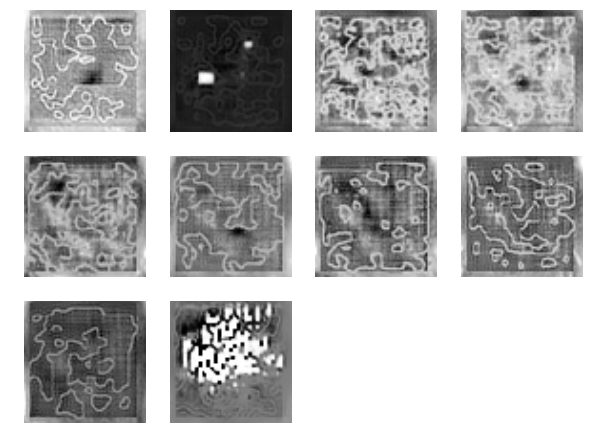

4.10494995117
4.05401802063
4.07743215561
3.80004048347
3.89029741287
4.11200809479
4.34841012955
4.27911090851
3.88794374466
3.87080764771


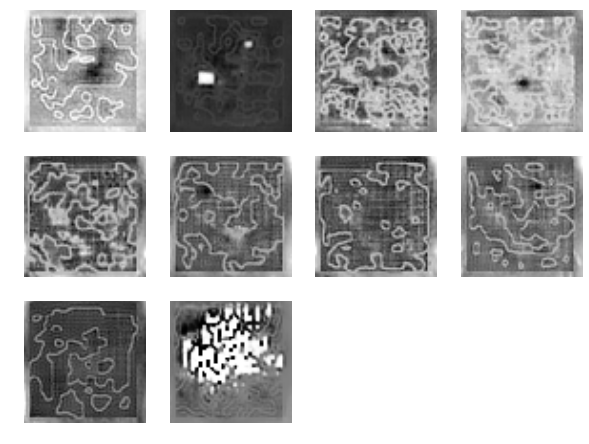

4.36629676819
4.19444465637
4.39044570923
4.33711004257
4.6302318573
3.99776721001
4.14269924164
4.50103473663
4.41969966888
4.52759361267


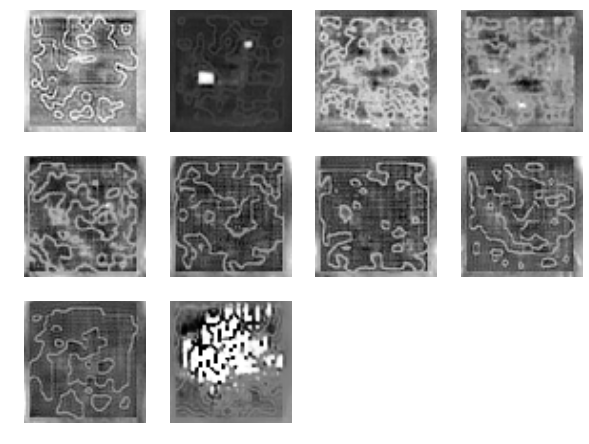

5.81864452362
4.18761014938
4.67981290817
4.17902994156
4.35441207886
3.43125009537
3.63027620316
3.9128241539
4.14587450027
4.13401937485


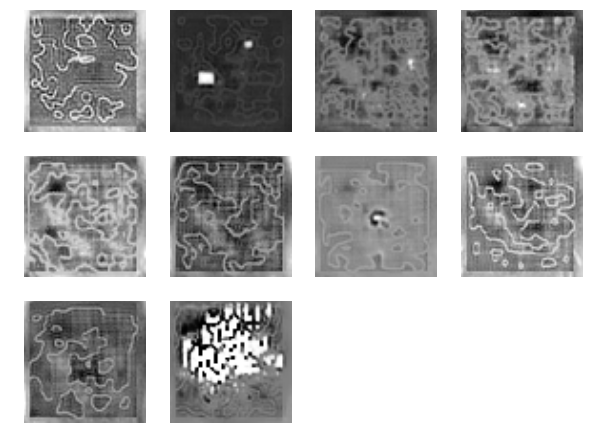

4.2938542366
5.02359867096
3.61727380753
3.32667851448
3.880215168
3.99857068062
4.02830266953
4.60904026031
4.63895797729
3.8011162281


In [144]:
from scipy.optimize import fmin_l_bfgs_b
import matplotlib.pyplot as plt
from lasagnekit.misc.plot_weights import grid_plot
%matplotlib inline
data.load()
xini = np.random.uniform(size=shape_inp).astype(np.float32)
#xini = capsule.preprocess(data.X[0:nb_examples])
layerarr = get_layer(xini)
layerarr = [arr.astype(np.float32) for arr in layerarr]
layervel = [np.zeros(arr.shape).astype(np.float32) for arr in layerarr]
CST.set_value(1)


for i in range(200):
    data.load()
    if i % 10 == 0:
        y = get_recons(*layerarr)
        fig = plt.figure(figsize=(10, 10))
        if y.shape[1] == 1:
            opt = {"cmap": "gray"}
            y = y[:, 0]
        else:
            opt = {}
            y = y.transpose((0, 2, 3, 1))
        
        grid_plot(y,
                  imshow_options=opt,
                  fig=fig)
        plt.show()
    layergrad = get_grad(*layerarr)
    layervel = [0.1 * vel + 0.9 * grad for vel, grad in zip(layervel, layergrad)]
    layerarr = [arr - vel for arr, vel in zip(layerarr, layervel)]
    
    print(get_loss(*layerarr))
